In [1]:
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
dataset_dir = r'D:\Kampus Merdeka\Documentation\Goat\dataset'
train_dir = r'D:\Kampus Merdeka\Documentation\Goat\train'
test_dir = r'D:\Kampus Merdeka\Documentation\Goat\test'

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

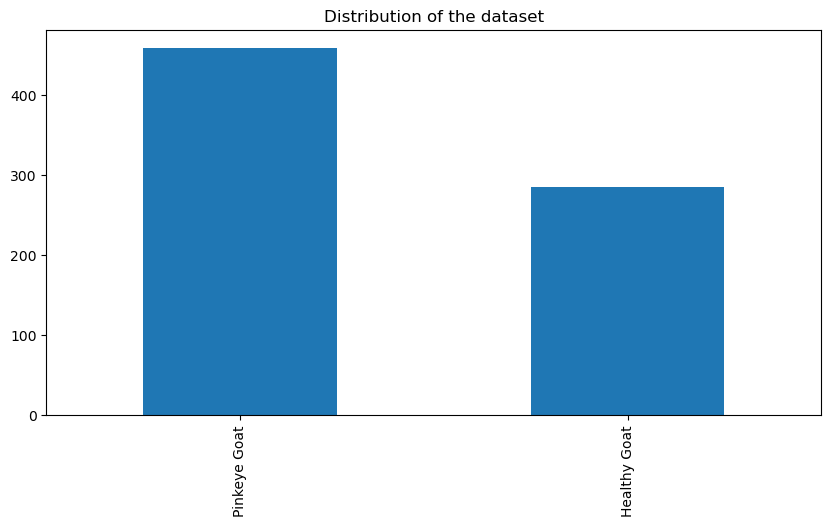

In [3]:
# Load images and labels
images = []
labels = []
classes = ['Pinkeye Goat', 'Healthy Goat']

for label in classes:
    path = os.path.join(dataset_dir, label)
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            images.append(os.path.join(path, file))
            labels.append(label)

# Plot the distribution of the labels
label_df = pd.DataFrame(labels, columns=['Labels'])
plt.figure(figsize=(10,5))
label_df['Labels'].value_counts().plot(kind='bar')
plt.title('Distribution of the dataset')
plt.show()
# Here, you can continue with your model training process.

In [4]:
# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, stratify=labels, test_size=0.2)

# Create subdirectories in train and test directories for each class
for label in ["Pinkeye Goat", "Healthy Goat"]:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Copy the data to the training and test folders
for i in range(len(train_images)):
    shutil.copy(train_images[i], os.path.join(train_dir, train_labels[i], os.path.basename(train_images[i])))

for i in range(len(test_images)):
    shutil.copy(test_images[i], os.path.join(test_dir, test_labels[i], os.path.basename(test_images[i])))

In [5]:
#pinkey goat
folder_path = (r'D:\Kampus Merdeka\Documentation\Goat\train\Pinkeye Goat')
test = os.listdir(folder_path)
for fichier in test: 
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [6]:
#healthy goat
folder_path = (r'D:\Kampus Merdeka\Documentation\Goat\train\Healthy Goat')
test = os.listdir(folder_path)
for fichier in test: 
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [7]:
#cek label
image_dir = Path(r'D:\Kampus Merdeka\Documentation\Goat\train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [11]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(2)

,Filepath,Label
0,D:\Kampus Merdeka\Documentation\Goat\train\Hea...,Healthy Goat
1,D:\Kampus Merdeka\Documentation\Goat\train\Pin...,Pinkeye Goat


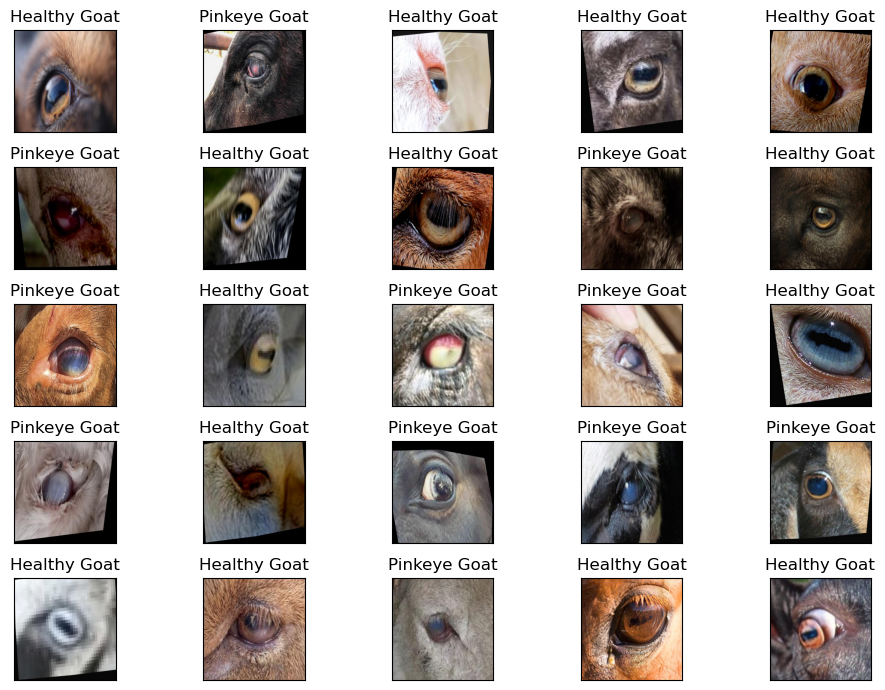

In [13]:
# Display some pictures of the dataset with their labels

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()